In [1]:
# The Following contains the process of prediciting a house value based on select features/specifications
    # Lots of Data Cleaning due to heavy amount of outliers 

In [61]:
import pandas as pd
import numpy as np # Library for Python, that supports large, multi-dimensional arrays and matrices
import sklearn
from sklearn import svm, metrics, preprocessing

# Load the Data and Append training and testing data

train = pd.read_csv(r'C:\Users\eesak\Desktop\datasets\housing\train.csv')
test  = pd.read_csv(r'C:\Users\eesak\Desktop\datasets\housing\test.csv' )

data = train.append(test,sort = False)
data

# Append both data sets together to create on large database

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [62]:
data['Alley'] = data['Alley'].fillna(0)

In [63]:
# create empty lists 
features = []
nullValues = []

for i in data: # searches each row in data
    if (data.isna().sum()[i])>1000 and i!= 'SalePrice': # isna() is a function that locates missing values and returns a boolean
                                                        # Adds the values that are null values' if there are more than 1000, proceed
                                                        # Ignore 'SalePrice' Column       
        features.append(i)
        nullValues.append(data.isna().sum()[i])         # Adds the values to the Null List
y_pos =np.arange(len(features))                         # Sorts the values in the features list
    

In [64]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import*

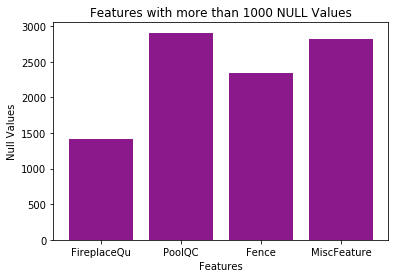

In [65]:
plt.bar(y_pos, nullValues, align = 'center', alpha = 0.9, color = 'purple')
    # Creating a BAR graph, alligning it in the center with main values are the arrange values in the features list
        # Alpha = transperacy of the graph

plt.xticks(y_pos, features) # Ticks at the X axis:
                                # xticks (ticks = None, Labels = None)
                                    # ticks are list of locations
                                    # labels are the labels given at such tic locations 
                                
plt.ylabel('Null Values') # Label for the Y Axis 
plt.xlabel('Features') # Label for the X Axis
plt.title('Features with more than 1000 NULL Values') # Title of the graph
plt.show()

In [66]:
data = data.dropna(axis = 1, how = 'any', thresh = 1000) # dropna -> drops the null values
                                                         # Thresh -> Tells column must have a minimum of N na values to drop
                                                         # 'any' drops the row/column if ANY value is a Null 
data = data.fillna(data.mean()) # Fillna replaces null values with the mean values 
data # print

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500.00000
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500.00000
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500.00000
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.00000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,180921.19589
1455,2916,160,RM,21.0,1894,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Abnorml,180921.19589
1456,2917,20,RL,160.0,20000,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,9,2006,WD,Abnorml,180921.19589
1457,2918,85,RL,62.0,10441,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,180921.19589


In [67]:
# Correlation is the statistical measurement that describes any relation between variables

# Features that are not correlated with output
data = pd.get_dummies(data) # Converts string values into integers
nonCorr = [column for column in data if abs(data[column].corr(data['SalePrice'])) <0.045]
data = data.drop(nonCorr, axis=1) # Drops any value that has no-correlation to the data

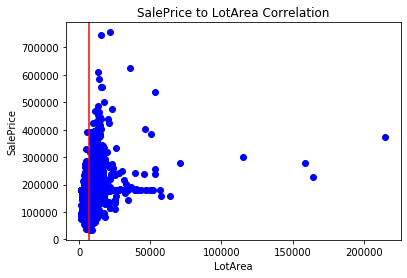

In [68]:
# Plotting Outliers

plt.plot(data['LotArea'], data['SalePrice'], 'bo') # bo is a style 
plt.axvline(x = 7000, color = 'r') # Vertical Line placed at X value of 7000
                                   # Color = red
    
plt.ylabel('SalePrice') # Label on the Y Axis
plt.xlabel('LotArea')   # Label on the X Axis
plt.title('SalePrice to LotArea Correlation') # Title
plt.show()

In [69]:
# seperating Data

newTrainingData = data.iloc[:1460] 
newTestingData = data.iloc[1460:]
# Integer Location  for selecting a position
newTrainingData

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,...,1,0,0,1,0,0,1,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,...,1,0,0,1,0,0,1,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,...,1,0,0,1,0,0,1,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,...,1,0,0,1,0,0,1,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,...,1,0,0,1,0,0,1,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,...,1,0,0,1,0,0,1,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,...,1,0,0,1,0,0,1,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,...,1,0,0,1,0,0,1,0,1,0


In [70]:
# Define a function that reuturns outliers
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #  Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #  Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #  Get outlier values
train_No_Outliers = newTrainingData

In [71]:
for column in newTrainingData: # search column in the new data
    outliers_List = np.ndarray.tolist(outliers_iqr(newTrainingData[column])[0])
        # returns the values in the array of elements into a list
        # Send to the list, and locate outliers from the middle
    train_No_Outliers = newTrainingData.drop(outliers_List) # remove all outliers and locate in train_No_outliers variable
train_No_Outliers = newTrainingData

In [72]:
from sklearn.linear_model import LinearRegression

X = train_No_Outliers.drop('SalePrice', axis = 1) 
    # Remove the sale price data in the data without outliers 
Y = np.log1p(train_No_Outliers['SalePrice'])
    # log1p -> "returns natural logarithm of one plus  the input array" - pageperso
regress = LinearRegression().fit(X,Y) 
    # Create a regression between the two data sets

In [73]:
newTest = newTestingData.drop('SalePrice', axis = 1)
prediction = np.expm1(regress.predict(newTest))
    # Use the prediction made from the regression

In [60]:
#Creating a Prediction
final = pd.DataFrame()
final['Id'] = test['Id']
    # Mapping the same Id from 'test' to 'test'
final['SalePrice'] = prediction
final

,Id,SalePrice
0,1461,114356.301571
1,1462,150020.000585
2,1463,175325.321332
3,1464,195255.013052
4,1465,205852.010441
...,...,...
1454,2915,80314.966393
1455,2916,82864.227991
1456,2917,160906.628216
1457,2918,115541.606309
